# CommonLit Readability (Kaggle Challenge)
## EDA

In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter

import re
import nltk
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.util import ngrams
from wordcloud import WordCloud

from utils.eda import (
    preprocess_for_analysis,
    get_ngram_and_freqs,
    get_wordcloud,
    get_word_count_and_length,
    get_sentence_count_and_length,
    get_kdeplot,
    get_scatterplot,
    get_histplot
)

In [ ]:
nltk.download('wordnet')
nltk.download("stopwords")
nltk.download("punkt")
nltk.download('omw-1.4')

In [4]:
sns.set_context("notebook", font_scale=1.2, rc={"lines.linewidth": 2.5})
palette = ["#7209C7","#3F99C5","#146F63","#F62585","#FFBA10"]
sns.set_style("darkgrid")

### Data Overview

In [5]:
train_df = pd.read_csv("train.csv")

In [6]:
train_df.sample(5)

,id,url_legal,license,excerpt,target,standard_error
781,d2556a097,https://www.africanstorybook.org/#,CC BY 4.0,"Goat, Dog and Cow were great friends. One day ...",0.810874,0.526753
2222,824ea20cc,NaN,NaN,Whenever the organ man came into the village o...,-1.451268,0.502584
489,14112c6ee,https://en.wikipedia.org/wiki/Miranda_warning,CC BY-SA 3.0,"The Miranda warning, which can also be referre...",-0.376545,0.482948
2525,28876f9d2,NaN,NaN,Mun Bun was not a very disobedient little boy;...,-1.285440,0.467678
1696,048ee8fb8,NaN,NaN,The resolution of the Government of South Aust...,-1.936372,0.484589


In [7]:
train_df.columns

Index(['id', 'url_legal', 'license', 'excerpt', 'target', 'standard_error'], dtype='object')

In [8]:
train_df.nunique()

id                2834
url_legal          667
license             15
excerpt           2834
target            2834
standard_error    2834
dtype: int64

Text(0.5, 1.0, 'Missing values')

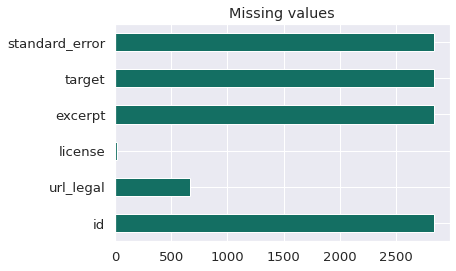

In [12]:
# missing values
train_df.nunique().plot.barh(color=palette[2],);
plt.title("Missing values")

### Preprocessing

In [13]:
example = train_df.iloc[1]["excerpt"]
print("Before preprocessing: \n", example)
example = preprocess_for_analysis(example)
print("\nAfter preprocessing: \n", example)

Before preprocessing: 
 All through dinner time, Mrs. Fayre was somewhat silent, her eyes resting on Dolly with a wistful, uncertain expression. She wanted to give the child the pleasure she craved, but she had hard work to bring herself to the point of overcoming her own objections.
At last, however, when the meal was nearly over, she smiled at her little daughter, and said, "All right, Dolly, you may go."
"Oh, mother!" Dolly cried, overwhelmed with sudden delight. "Really?
Oh, I am so glad! Are you sure you're willing?"
"I've persuaded myself to be willing, against my will," returned Mrs. Fayre, whimsically. "I confess I just hate to have you go, but I can't bear to deprive you of the pleasure trip. And, as you say, it would also keep Dotty at home, and so, altogether, I think I shall have to give in."
"Oh, you angel mother! You blessed lady! How good you are!" And Dolly flew around the table and gave her mother a hug that nearly suffocated her.

After preprocessing: 
 dinner time Mr

In [14]:
# preprocess dataset
train_df["excerpt_preprocessed"] = train_df["excerpt"].apply(lambda row: preprocess_for_analysis(row))

### Visualizations and Analysis

#### Target Distribution

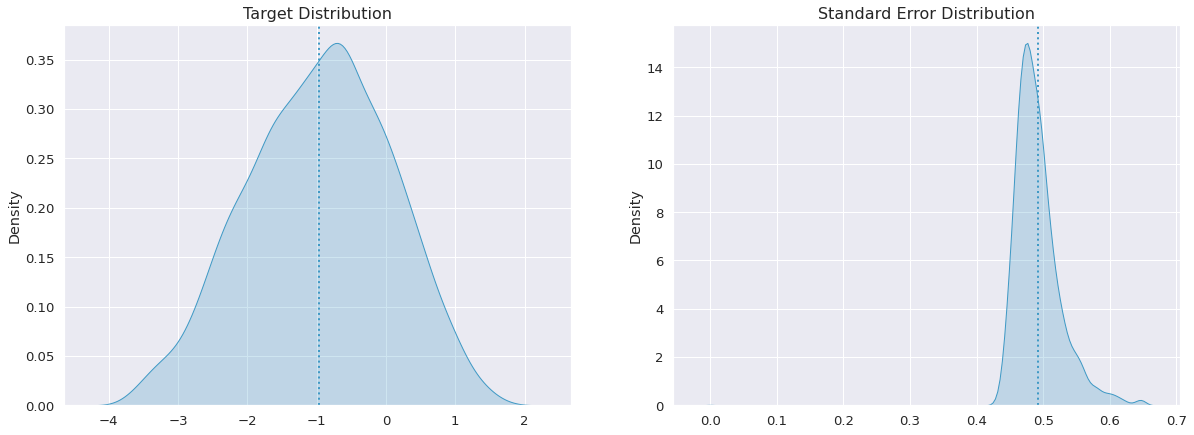

In [48]:
plt.figure(figsize=(20, 7))
plt.subplot(1, 2, 1)
sns.kdeplot(train_df["target"], color=palette[1], shade=True).set_title("Target Distribution", fontsize=16)
plt.axvline(train_df["target"].mean(), color=palette[1], linewidth=2, linestyle=":")
plt.xlabel("")

plt.subplot(1, 2, 2)
sns.kdeplot(train_df["standard_error"], color=palette[1], shade=True).set_title("Standard Error Distribution", fontsize=16)
plt.axvline(train_df["standard_error"].mean(), color=palette[1], linewidth=2, linestyle=":")
plt.xlabel("")

plt.show()

#### N-grams

In [49]:
ngram_dict, freqs_dict = get_ngram_and_freqs(train_df["excerpt_preprocessed"])

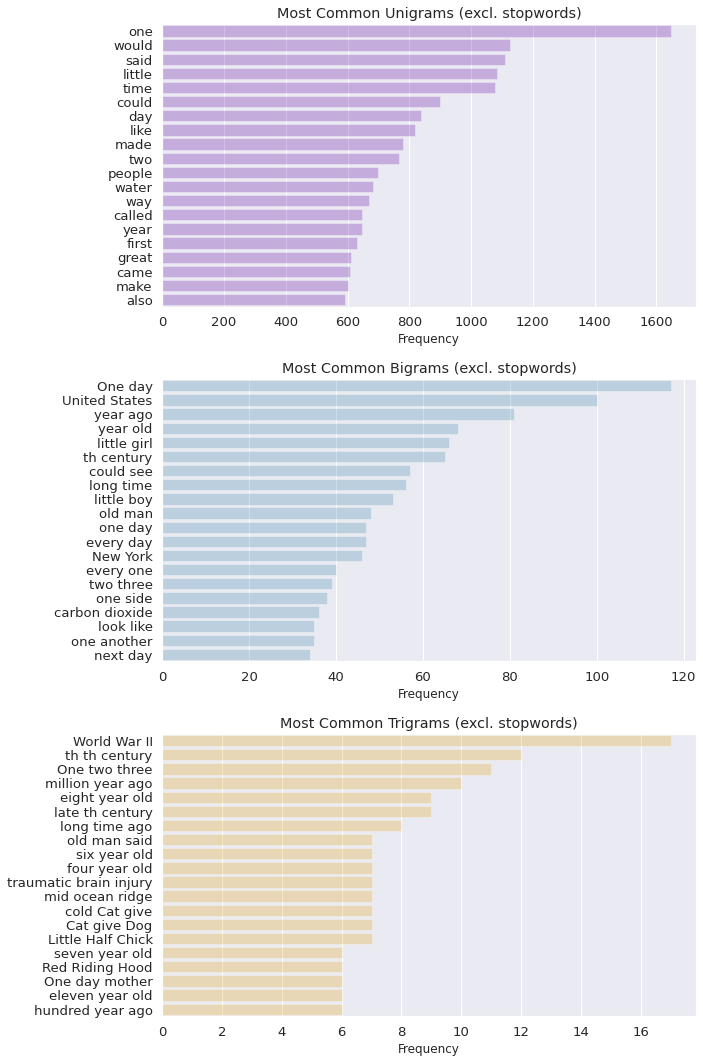

In [54]:
ngrams = ["unigrams", "bigrams", "trigrams"]
colors = [0, 1, 4]
plt.figure(figsize=(10, 15))
for idx in range(3):
    plt.subplot(3, 1, idx+1)
    sns.barplot(x=freqs_dict[ngrams[idx]][:20], y=ngram_dict[ngrams[idx]][:20], color=palette[colors[idx]], linewidth=1, alpha=0.3)
    plt.title(f"Most Common {ngrams[idx].capitalize()} (excl. stopwords)")
    plt.xlabel("Frequency", size=12)
plt.tight_layout()
plt.show()

#### Wordcloud

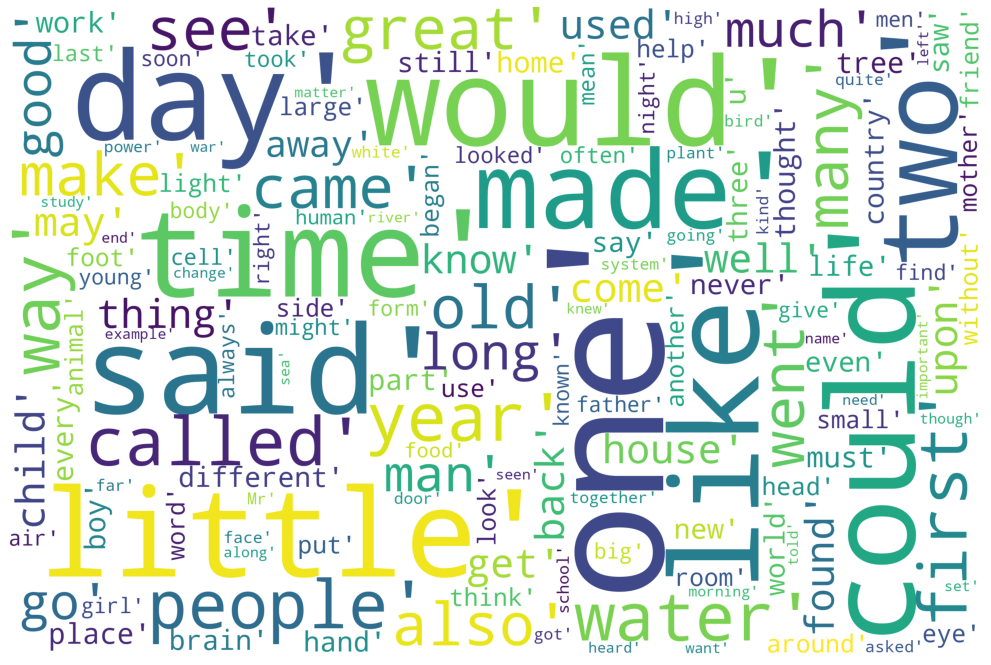

In [55]:
cloud = get_wordcloud(train_df["excerpt_preprocessed"], 150)

fig = plt.figure(figsize=(14,14))
plt.imshow(cloud)
plt.axis('off')
plt.tight_layout()
plt.show()

#### Text features

In [56]:
word_count, word_length = get_word_count_and_length(train_df["excerpt"])
word_count_prep, word_length_prep = get_word_count_and_length(train_df["excerpt_preprocessed"])
train_df["word_count"] = word_count
train_df["word_length"] = word_length
train_df["word_count_preprocessed"] = word_count_prep
train_df["word_length_preprocessed"] = word_length_prep

In [57]:
sent_count, sent_length = get_sentence_count_and_length(train_df["excerpt"])
sent_count_prep, sent_length_prep = get_sentence_count_and_length(train_df["excerpt_preprocessed"])
train_df["sentence_count"] = sent_count
train_df["sentence_length"] = sent_length
train_df["sentence_count_preprocessed"] = sent_count_prep
train_df["sentence_length_preprocessed"] = sent_length_prep

[nltk_data] Downloading package wordnet to
[nltk_data]     /home/hkortschak/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/hkortschak/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/hkortschak/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /home/hkortschak/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


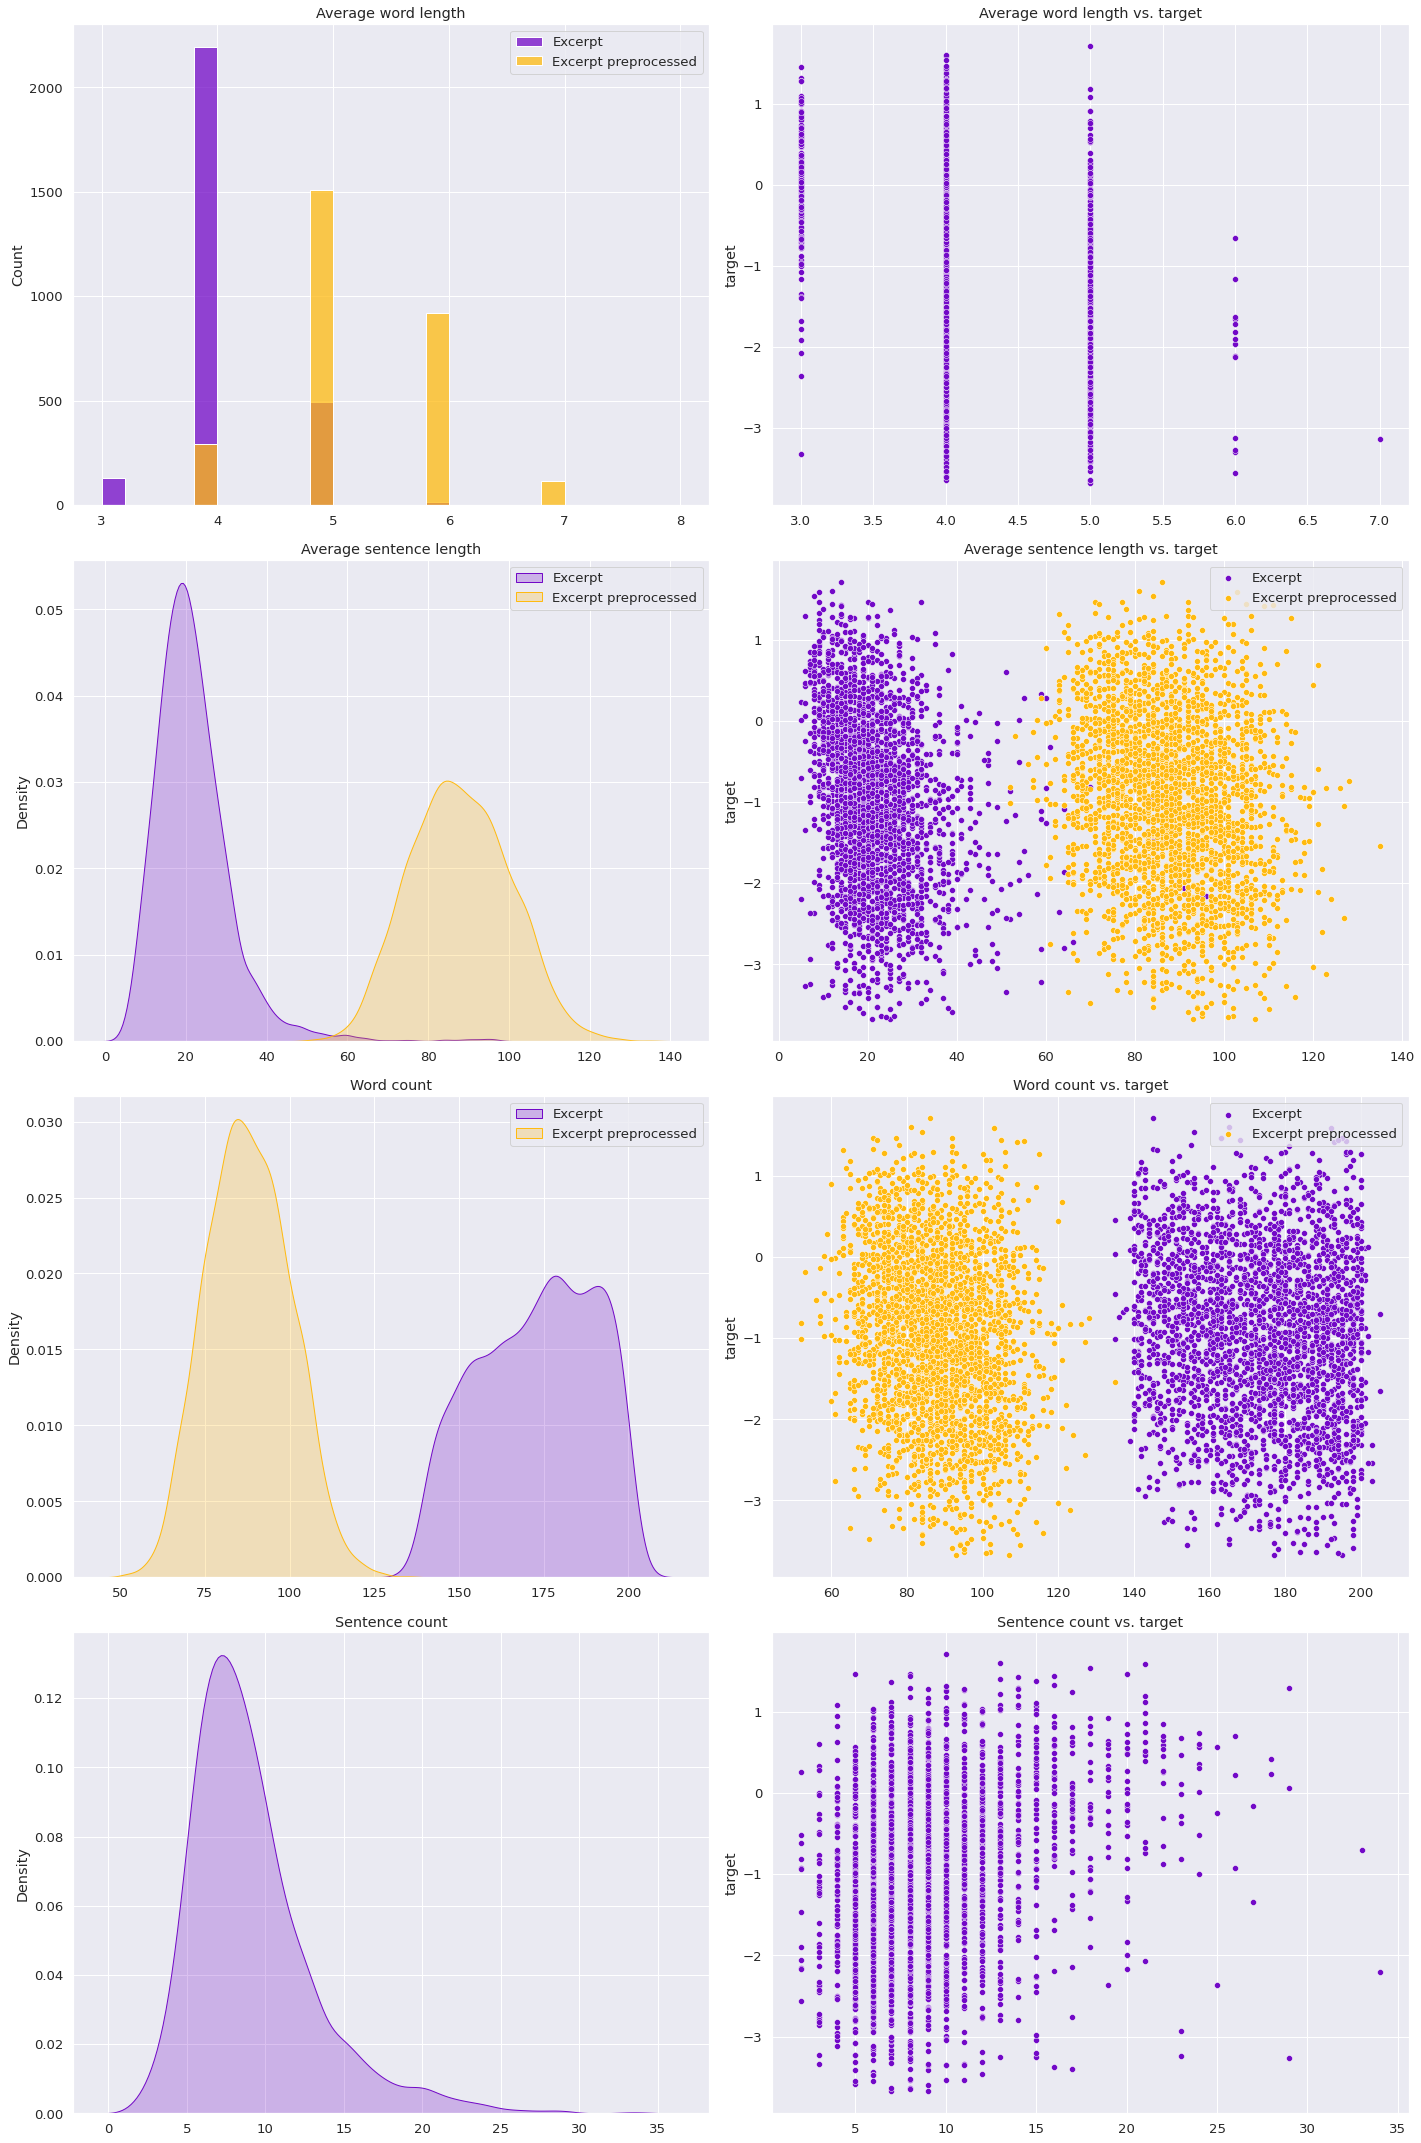

In [69]:
plt.figure(figsize=(20, 30))  

col1 = "word_length"
col2 = "word_length_preprocessed"
plt.subplot(4, 2, 1)
get_histplot(df=train_df, col1=col1, col2=col2, title="Average word length")
plt.subplot(4, 2, 2)
get_scatterplot(df=train_df, col1=col1, title="Average word length vs. target") 

col1 = "sentence_length"
col2 = "sentence_length_preprocessed"
plt.subplot(4, 2, 3)
get_kdeplot(df=train_df, col1=col1, col2=col2, title="Average sentence length")
plt.subplot(4, 2, 4)
get_scatterplot(df=train_df, col1=col1, col2=col2, title="Average sentence length vs. target")

col1 = "word_count"
col2 = "word_count_preprocessed"
plt.subplot(4, 2, 5)
get_kdeplot(df=train_df, col1=col1, col2=col2, title="Word count")
plt.subplot(4, 2, 6)
get_scatterplot(df=train_df, col1=col1, col2=col2, title="Word count vs. target")

col1 = "sentence_count"
plt.subplot(4, 2, 7)
get_kdeplot(df=train_df, col1=col1, title="Sentence count")
plt.subplot(4, 2, 8)
get_scatterplot(df=train_df, col1=col1, title="Sentence count vs. target")  

plt.tight_layout()
plt.show();

#### Text examples

In [250]:
most_difficult_excerpt = train_df[train_df["target"] == train_df["target"].min()]
print("Most difficult excerpt:\n", most_difficult_excerpt["excerpt"].iloc[0], "\n")

least_difficult_excerpt = train_df[train_df["target"] == train_df["target"].max()]
print("Least difficult excerpt:\n", least_difficult_excerpt["excerpt"].iloc[0])

Most difficult excerpt:
 The commutator is peculiar, consisting of only three segments of a copper ring, while in the simplest of other continuous current generators several times that number exist, and frequently 120! segments are to be found. These three segments are made so as to be removable in a moment for cleaning or replacement. They are mounted upon a metal support, and are surrounded on all sides by a free air space, and cannot, therefore, lose their insulated condition. This feature of air insulation is peculiar to this system, and is very important as a factor in the durability of the commutator. Besides this, the commutator is sustained by supports carried in flanges upon the shaft, which flanges, as an additional safeguard, are coated all over with hard rubber, one of the finest known insulators. It may be stated, without fear of contradiction, that no other commutator made is so thoroughly insulated and protected. The three commutator segments virtually constitute a singl

In [254]:
longest_excerpt = train_df[train_df["word_count"] == train_df["word_count"].max()]
print("Example of one of the longest excerpt:\n", longest_excerpt["excerpt"].iloc[0], "\n")

shortest_excerpt = train_df[train_df["word_count"] == train_df["word_count"].min()]
print("Example of one of the shortest excerpt:\n", shortest_excerpt["excerpt"].iloc[0])

Example of one of the longest excerpt:
 One simple example would be setting up an experiment to see if a particular plant food improved plant growth over a month. First, we would get 20 of the same type of plants of a similar age and size. In this example, plant type, age, and size at the start of the experiment are variables that we want to keep the same. Next, we would divide the plants into two groups by numbering them and randomly drawing numbers. The first 10 plants would go into our treatment group—the plants that get the plant food. The second 10 plants will go into what we call our control group—these are the plants that do not get plant food. This method of assigning things to groups is called randomization, and it makes sure that every plant involved in our study has an equal chance of being picked for either group. This is the best way to make sure that the groups are as equal as possible. Then, for a month, we give the plant food to the treatment group but not to the contro